## King County Housing Sales

- Student name: Olaide Kashimawo
- Student pace: Self Paced
- Scheduled project review date/time: 
- Instructor name:Morgan Jones
- Blog post URL: TBD

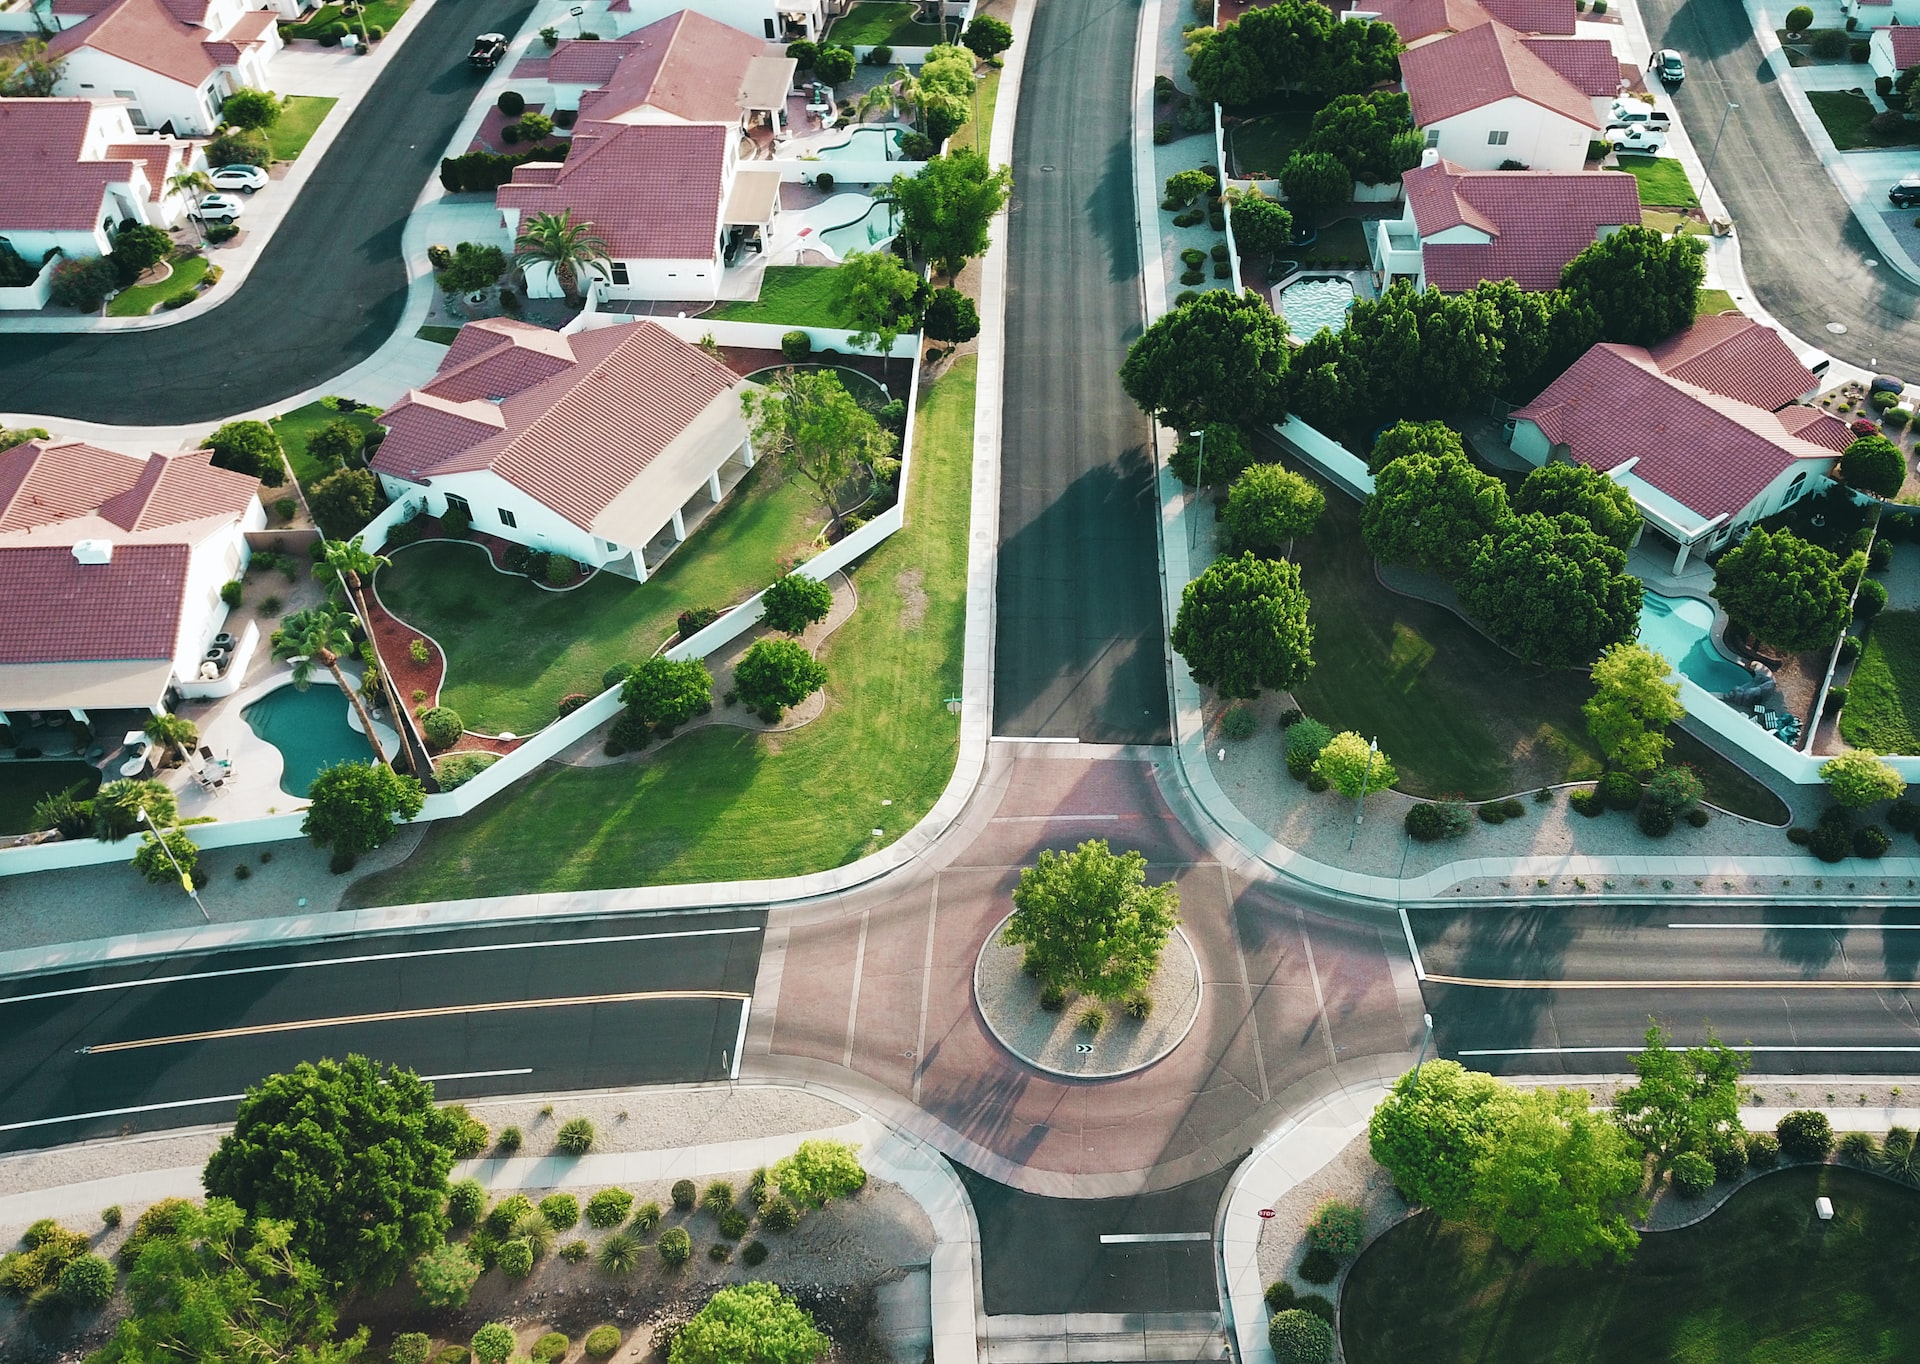

### OVERVIEW

This dataset comprises the prices of homes that were sold in King County, which is where Seattle is located. It encompasses houses that were purchased between May 2014 and May 2015.

**id**:  a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms/House

**bathrooms**: Number of bathrooms/bedrooms

**sqft_living**: square footage of the home

**sqft_lot**: square footage of the lot

**floors**: Total floors (levels) in house

**waterfront**: House which has a view to a waterfront

**view**: Houses that has been viewed

**condition** :How good the condition is Overall

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_above**:square footage of house apart from basement

**sqft_basement**: square footage of the basement

**yr_built** :Built Year

**yr_renovated** :Year when house was renovated

**zipcode**:zip code

**lat**: Latitude coordinate

**long**: Longitude coordinate

**sqft_living15** :Living room area in 2015 (means-- some renovations) 

**sqft_lot15** :Lotsize area in 2015 (means -- some renovations)

### BUSINESS UNDERSTANDING


To identify the variables affecting house prices, e.g area, number of rooms,bathrooms  and to create a linear model that quantitatively relates house prices with variables such as number of rooms, area and number of bathrooms

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime as dt
import folium
import warnings
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
style.use('ggplot')

plt.style.use('seaborn')
sns.set_theme()
%matplotlib inline


In [2]:
pd.set_option('display.max_column',21)

### DATA LOAD

In [3]:
#Load data into notebook
H_Sales = pd.read_csv("data/kc_house_data.csv")
H_Sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#checking the shape
H_Sales.shape

(21613, 21)

In [5]:
#checking the info to Display the data types of each Column (21 columns)
H_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#To suppress the scientific notation in price
pd.set_option('display.float_format', lambda x: '%.5f'%x)

In [7]:
H_Sales.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00000,4580301520.86499,2876565571.31206,1000102.00000,2123049194.00000,3904930410.00000,7308900445.00000,9900000190.00000
price,21613.00000,540088.14177,367127.19648,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
floors,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,21613.00000,0.00754,0.08652,0.00000,0.00000,0.00000,0.00000,1.00000
view,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000


In [8]:
H_Sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### DATA CLEANING
There are 19 house features plus the price and the id columns, along with 21613 observations.

In [9]:
#checking and removing null data
H_Sales.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**There are no null data, let check for missing values**

In [10]:
#checking for duplicate values
H_Sales.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [11]:
#removing duplicates by checking the IDs
H_Sales.drop_duplicates(subset='id', keep='first', inplace=False, ignore_index=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [12]:
#Drop the columns "id" from axis 1

H_Sales = H_Sales.drop(['id', 'zipcode','lat','long'], axis=1)

###  Identify outliers using the boxplot 

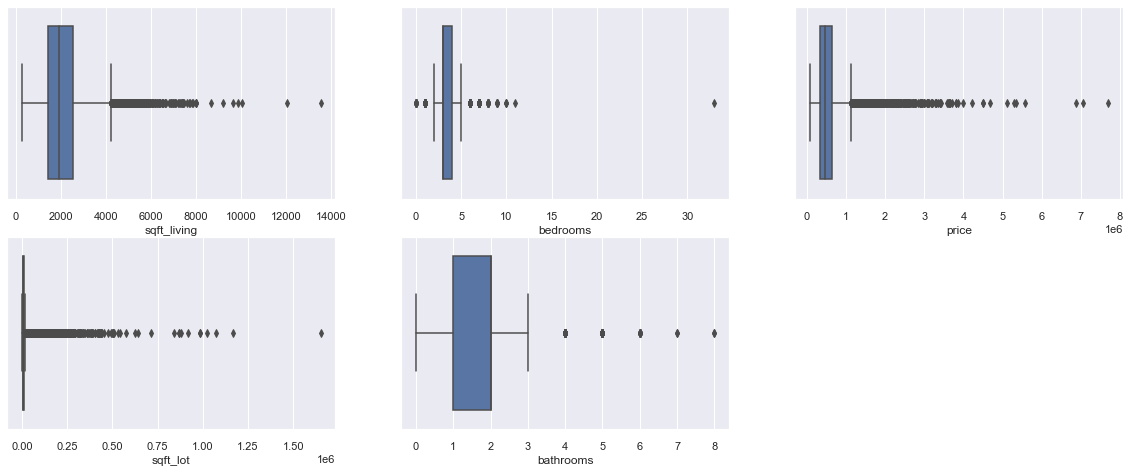

In [13]:
# Identify outliers using the boxplot 
plt.figure(figsize=(20,12))

plt.subplot(331)
sns.boxplot(H_Sales.sqft_living)
plt.subplot(332)
sns.boxplot(H_Sales.bedrooms)
plt.subplot(333)
sns.boxplot(H_Sales.price)
plt.subplot(334)
sns.boxplot(H_Sales.sqft_lot)
plt.subplot(335)
sns.boxplot(H_Sales.bathrooms.astype('int'))
plt.show()

### Remove_outliers

In [14]:
#Remove our outliers

H_Sales = H_Sales[H_Sales.sqft_living < 8500]
H_Sales = H_Sales[H_Sales.bedrooms < 5]
H_Sales = H_Sales[H_Sales.price < 3800000]
H_Sales = H_Sales[H_Sales.sqft_lot < 600000]
H_Sales = H_Sales[H_Sales.bathrooms < 4]

In [15]:
len(H_Sales)

19491

In [16]:
H_Sales.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000,19491.00000
mean,505645.36314,3.18116,2.02196,1956.17270,14144.43025,1.48053,0.00677,0.20697,3.40629,7.57498,1705.85121,250.32148,1970.72695,80.78221,1932.34821,12423.80807
std,296294.27977,0.70741,0.68422,788.76108,32996.32268,0.54183,0.08202,0.71927,0.64965,1.11082,740.57901,394.11804,29.25920,393.32032,640.95779,25582.38106
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,399.00000,651.00000
25%,314500.00000,3.00000,1.50000,1380.00000,5000.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1160.00000,0.00000,1951.00000,0.00000,1460.00000,5036.00000
50%,437000.00000,3.00000,2.00000,1820.00000,7500.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1510.00000,0.00000,1975.00000,0.00000,1800.00000,7524.00000
75%,612500.00000,4.00000,2.50000,2400.00000,10369.50000,2.00000,0.00000,0.00000,4.00000,8.00000,2100.00000,480.00000,1996.00000,0.00000,2290.00000,9933.50000
max,3710000.00000,4.00000,3.75000,7620.00000,577605.00000,3.50000,1.00000,4.00000,5.00000,13.00000,7420.00000,3500.00000,2015.00000,2015.00000,5790.00000,560617.00000


In [54]:
H_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19491 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19491 non-null  datetime64[ns]
 1   price          19491 non-null  float64       
 2   bedrooms       19491 non-null  int64         
 3   bathrooms      19491 non-null  float64       
 4   sqft_living    19491 non-null  int64         
 5   sqft_lot       19491 non-null  int64         
 6   floors         19491 non-null  float64       
 7   waterfront     19491 non-null  int64         
 8   view           19491 non-null  int64         
 9   condition      19491 non-null  int64         
 10  grade          19491 non-null  int64         
 11  sqft_above     19491 non-null  int64         
 12  sqft_basement  19491 non-null  float64       
 13  yr_built       19491 non-null  int64         
 14  yr_renovated   19491 non-null  int64         
 15  sqft_living15  1949

### EXPLORATORY DATA ANALYSIS

### Dealing with Multicollinearity

Examining the data's correlation matrix. I'll explain the intended relationship between the variables using the heatmap. 

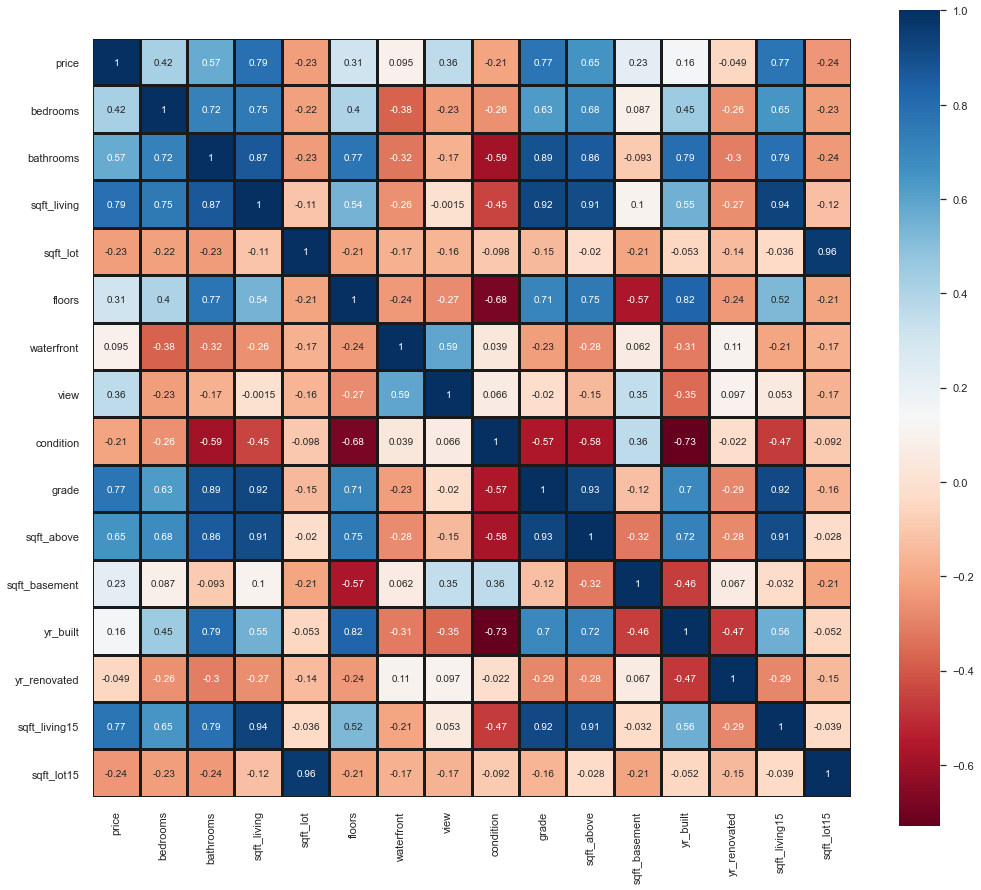

In [17]:
#Creating a correlation plot 
house_corr = H_Sales.corr()
plt.subplots(figsize=(17,15))
sns.heatmap(house_corr.astype(float).corr(),linewidths=2.0,vmax=1.0, square=True, cmap="RdBu", linecolor='k', annot=True)
plt.show()

In [18]:
price_corr = house_corr.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.00000
sqft_living      0.78543
sqft_living15    0.76828
grade            0.76737
sqft_above       0.65115
bathrooms        0.56943
bedrooms         0.42118
view             0.35940
floors           0.31366
sqft_basement    0.22937
yr_built         0.15565
waterfront       0.09477
yr_renovated    -0.04950
condition       -0.21362
sqft_lot        -0.22770
sqft_lot15      -0.24488
Name: price, dtype: float64


There is a high correlation between sqft_living and price. It seems that there is a positive linear relationship between the two. Going by general trend an increase in living space will lead to increase in price.from this we can see year renovated has tge low correlation

The dark blue color has correlation of 1 which is the price.
There is a strong relationship between the price (target variable) and the number of bedrooms, bathrooms,sqft_living, floors, waterfront, view, grade, sqft_above, sqft_above and sqft_living15.

### Distribution

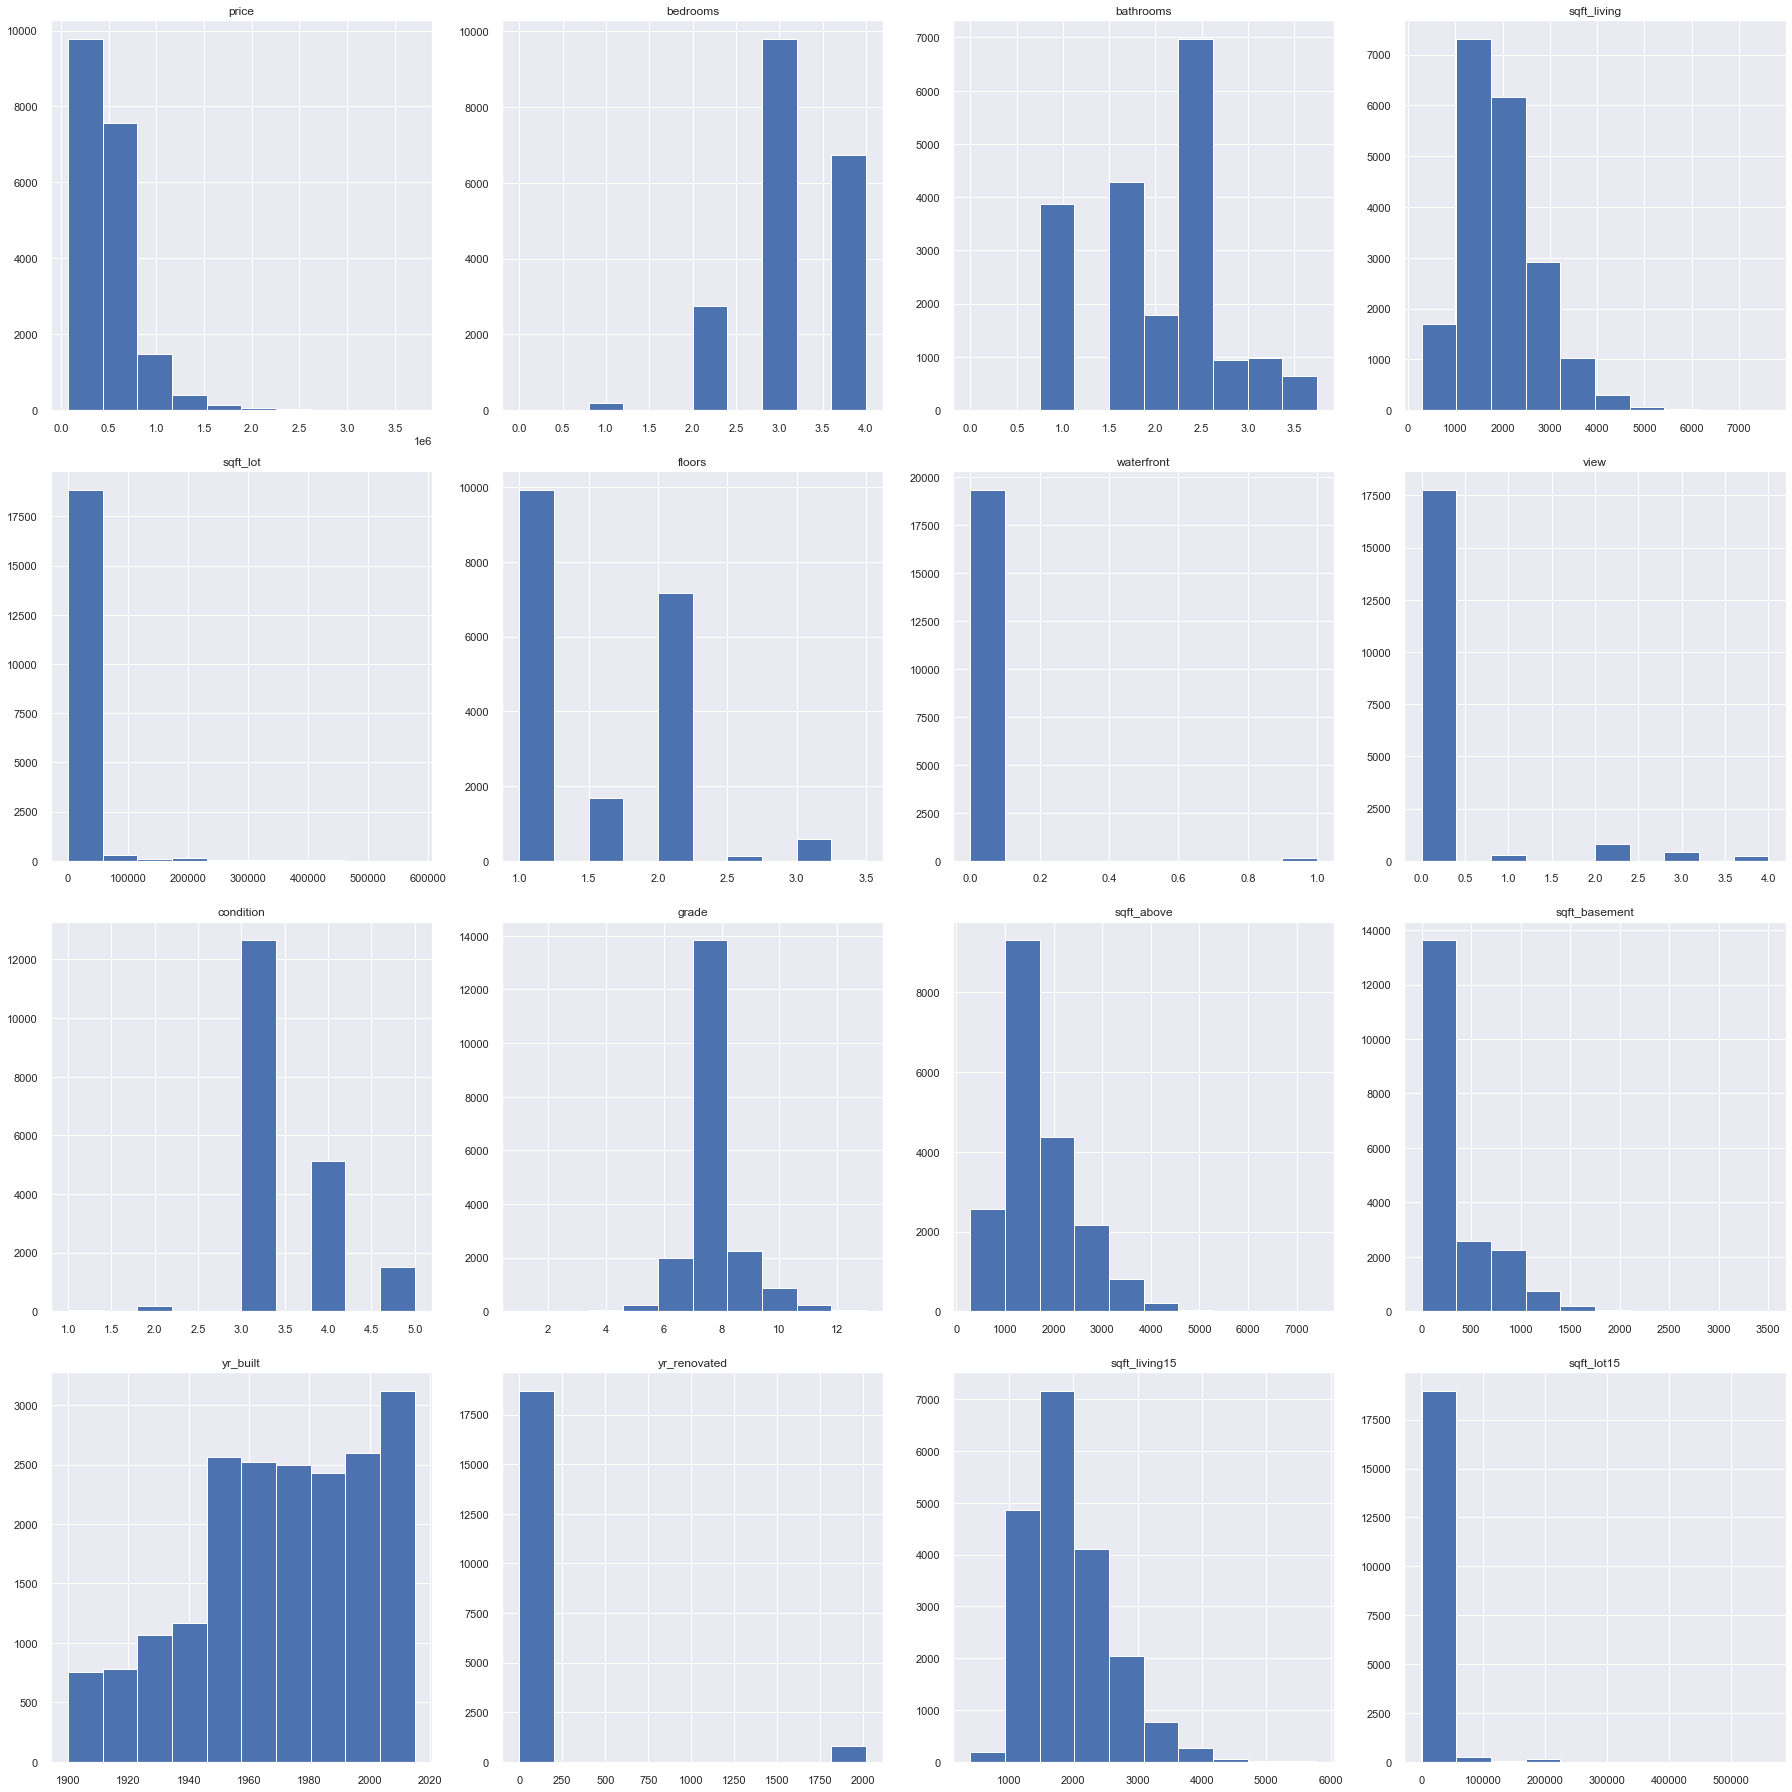

In [19]:
H_Sales.hist(figsize=(25,25))
plt.tight_layout()

#### Feature Engineering From Date

In [20]:
H_Sales['date'] = pd.to_datetime(H_Sales['date'])
H_Sales['month'] = H_Sales['date'].dt.month_name().str[:3]
H_Sales['year']=H_Sales['date'].apply(lambda date:date.year)

### Highly correlated features relationship with price and the conditions of the houses

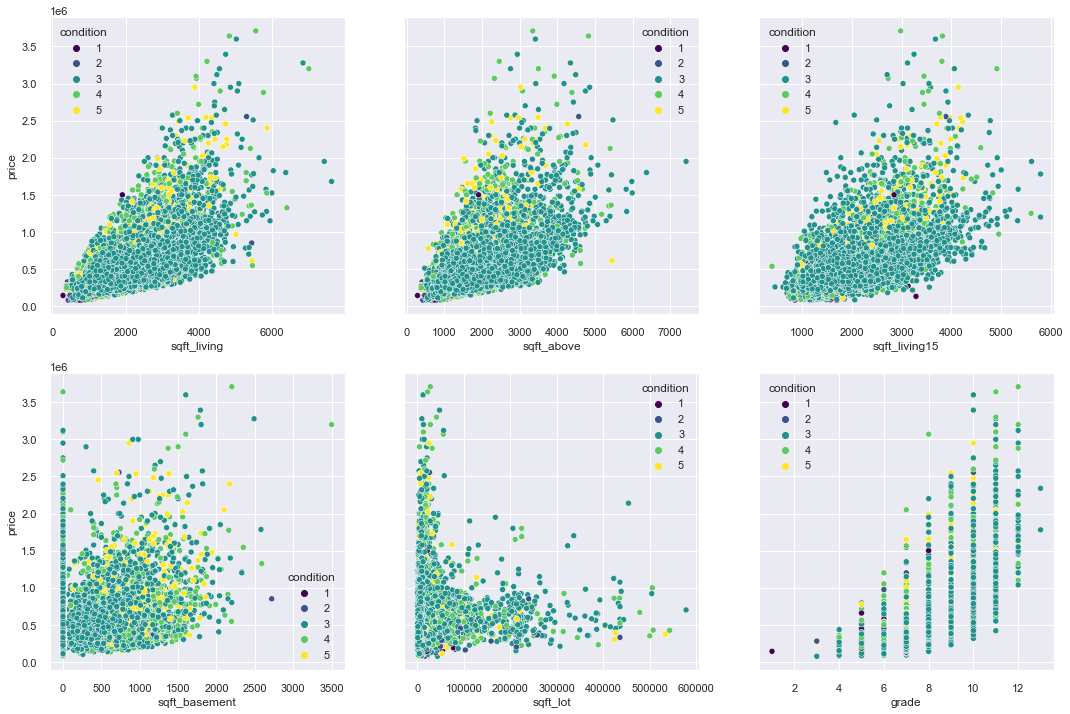

In [21]:
fig, axs = plt.subplots( nrows=2, ncols=3, sharey=True, figsize=(18,12))

sns.scatterplot(y='price',x='sqft_living',data=H_Sales,hue='condition', palette='viridis', ax=axs[0,0])
sns.scatterplot(y='price',x='sqft_above',data=H_Sales, hue='condition', palette='viridis', ax=axs[0,1])
sns.scatterplot(y='price',x='sqft_living15',data=H_Sales,hue='condition',  palette='viridis', ax=axs[0,2])
sns.scatterplot(y='price',x='sqft_basement',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,0])
sns.scatterplot(y='price',x='sqft_lot',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,1])
sns.scatterplot(y='price',x='grade',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,2])
plt.show()

Scatter plot of price with the features like sqft_living, sqft_above, sqft_living15, sqft_basement, sqft_lot at  different condition as hue.

### Does the Square_Feet have any impact on the Prices?

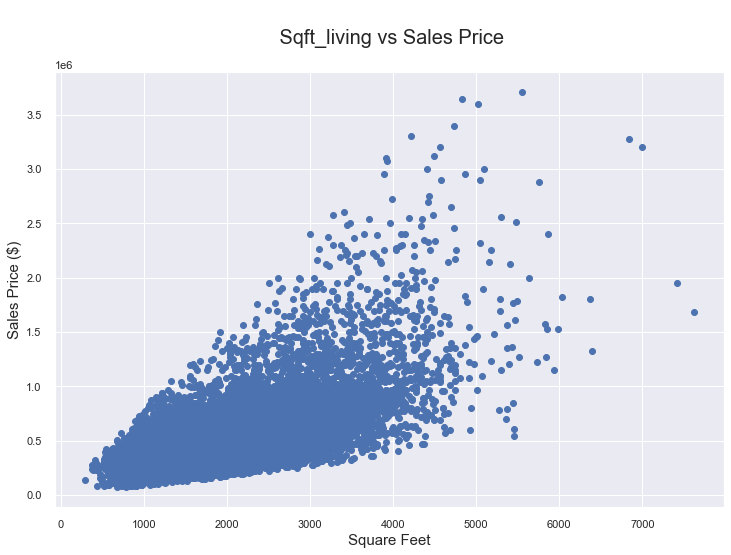

In [22]:
plt.figure(figsize= (12,8))
plt.title("\n Sqft_living vs Sales Price\n",fontsize=20)
plt.scatter(H_Sales['sqft_living'], H_Sales['price'])
plt.ylabel('Sales Price ($)',fontsize=15)
plt.xlabel('Square Feet',fontsize=15)
plt.show()


### Does the Grade have any impact on the house price ?

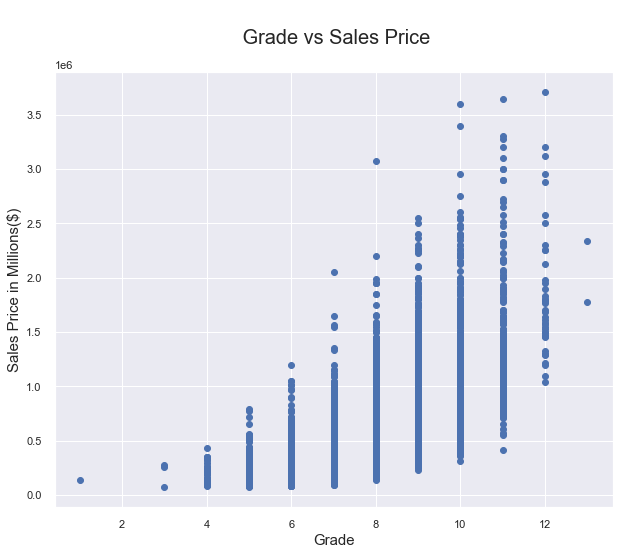

In [23]:
plt.figure(figsize= (10,8))
plt.title("\n Grade vs Sales Price\n",fontsize=20)
plt.scatter(H_Sales['grade'], H_Sales['price'])
plt.ylabel('Sales Price in Millions($)',fontsize=15)
plt.xlabel('Grade',fontsize=15)
plt.show()

### Does the waterfront property have any impact on the house price ?

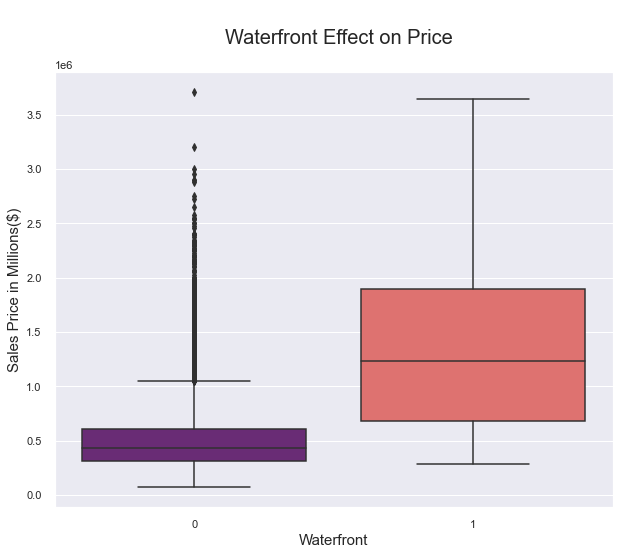

In [24]:
plt.figure(figsize= (10,8))
plt.title("\n  Waterfront Effect on Price\n",fontsize=20)
sns.boxplot(y='price',x='waterfront',data=H_Sales, palette='magma')
plt.ylabel('Sales Price in Millions($)', fontsize=15)
plt.xlabel('Waterfront', fontsize=15)
plt.show()

Waterfront houses seem to have an impact on prices
The median price reveals that certain waterfront properties are within reach of the average buyer.

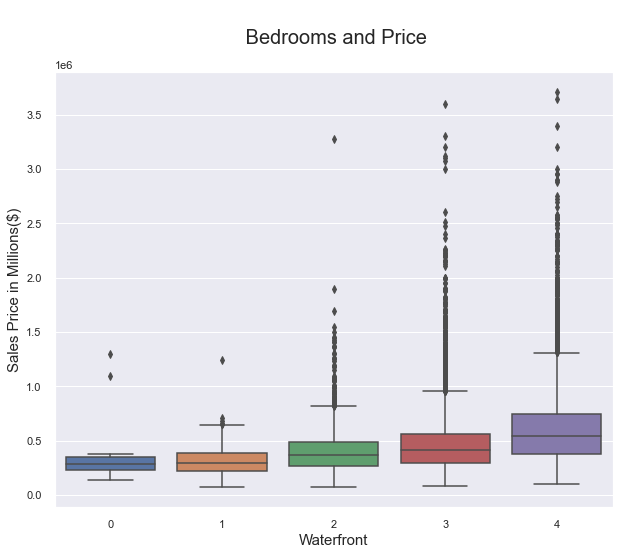

In [25]:
# checking price and bedrooms relationship
plt.figure(figsize= (10,8))
plt.title("\n Bedrooms and Price\n",fontsize=20)
sns.boxplot(x='bedrooms', y='price', data=H_Sales);
plt.ylabel('Sales Price in Millions($)', fontsize=15)
plt.xlabel('Waterfront', fontsize=15)
plt.show()

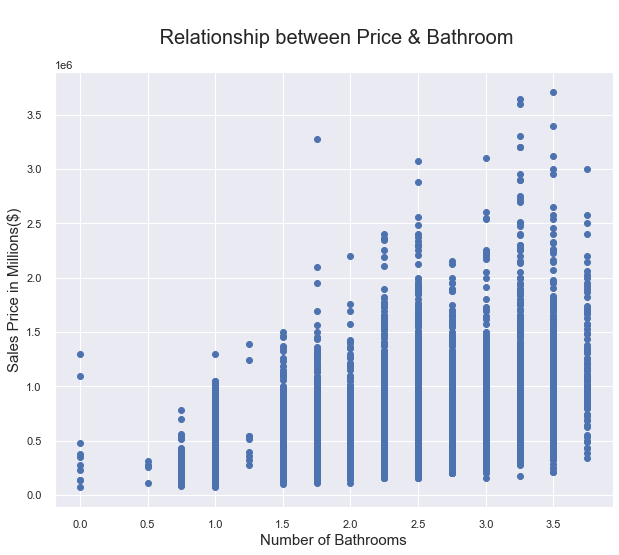

In [26]:
# checking price and bathrooms relationship
plt.figure(figsize= (10,8))
plt.title("\n Relationship between Price & Bathroom\n",fontsize=20)
plt.scatter(H_Sales['bathrooms'], H_Sales['price']);
plt.ylabel('Sales Price in Millions($)',fontsize=15)
plt.xlabel('Number of Bathrooms',fontsize=15)
plt.show()

In [27]:
H_Sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650,Oct,2014
1,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639,Dec,2014
2,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062,Feb,2015
3,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000,Dec,2014
4,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503,Feb,2015


In [28]:
H_Sales.groupby('month').mean()['price']

month
Apr   529789.81778
Aug   506659.17054
Dec   484885.19482
Feb   477035.90853
Jan   489841.91240
Jul   513848.79321
Jun   517229.43737
Mar   508755.35145
May   513474.04244
Nov   491740.91601
Oct   500045.03357
Sep   498791.22236
Name: price, dtype: float64

<AxesSubplot:title={'center':'\n Months relationship with Price\n'}, xlabel='month'>

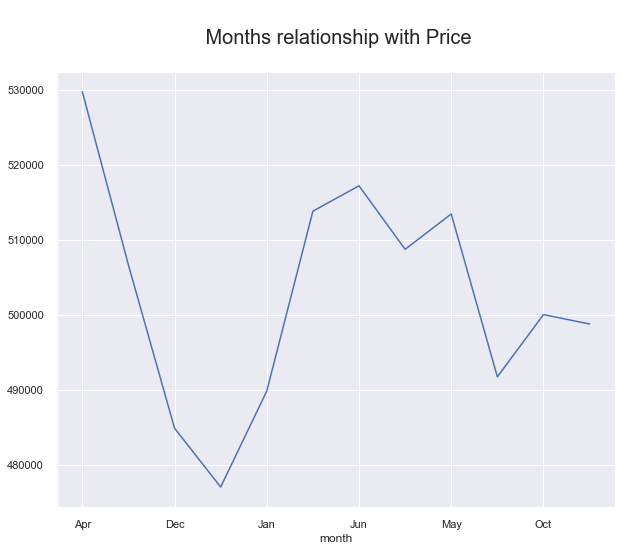

In [29]:
plt.figure(figsize= (10,8))
plt.title("\n Months relationship with Price\n",fontsize=20)
H_Sales.groupby('month').mean()['price'].plot()

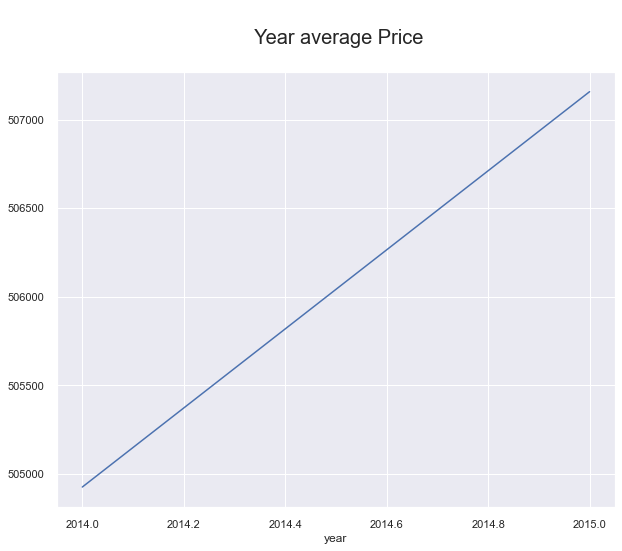

In [30]:
plt.figure(figsize= (10,8))
plt.title("\n Year average Price\n",fontsize=20)
H_Sales.groupby('year').mean()['price'].plot(kind='line')
plt.show()

In [31]:
H_Sales['sqft_basement'].value_counts()

0       12321
600       200
500       199
700       195
400       174
        ...  
3500        1
1245        1
1990        1
295         1
1135        1
Name: sqft_basement, Length: 256, dtype: int64

In [32]:
H_Sales.loc[H_Sales['sqft_basement'] == '?', 'sqft_basement'] = 0

In [33]:
H_Sales['sqft_basement'] = H_Sales['sqft_basement'].astype(float)

In [34]:
H_Sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0.00000,1955,0,1340,5650,Oct,2014
1,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400.00000,1951,1991,1690,7639,Dec,2014
2,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0.00000,1933,0,2720,8062,Feb,2015
3,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910.00000,1965,0,1360,5000,Dec,2014
4,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0.00000,1987,0,1800,7503,Feb,2015


### FEATURE ENGINEERING

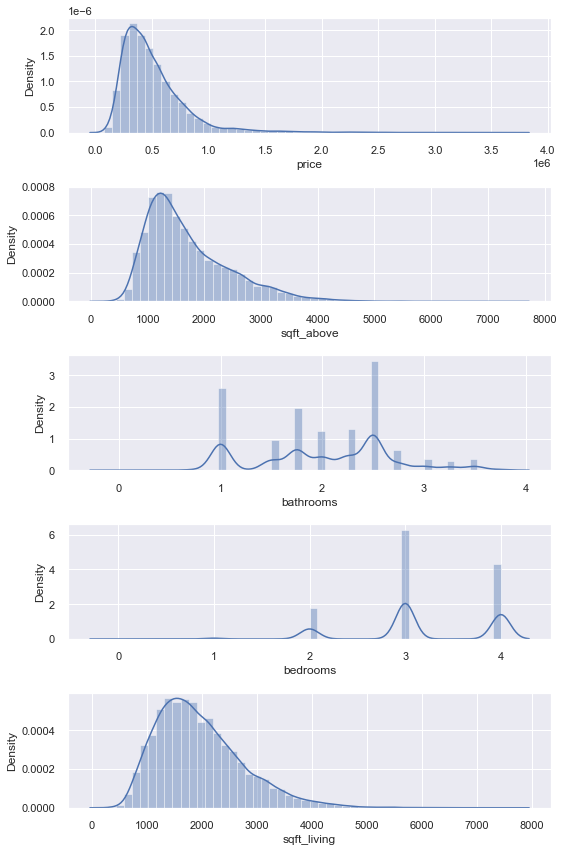

In [55]:
#look at distributions 
fig, axes = plt.subplots(5, 1, figsize=(8, 12))
sns.distplot(H_Sales['price'], ax=axes[0])
sns.distplot(H_Sales['sqft_above'], ax=axes[1])
sns.distplot(H_Sales['bathrooms'], ax=axes[2])
sns.distplot(H_Sales['bedrooms'], ax=axes[3])
sns.distplot(H_Sales['sqft_living'], ax=axes[4])                    
plt.tight_layout()

Linear Regression when we have one dependent variable (feature) and one independent variable. Here we will pick sqft_living as our independent variable x

 ### 1. Using seaborn.regplot() and scipy.stats

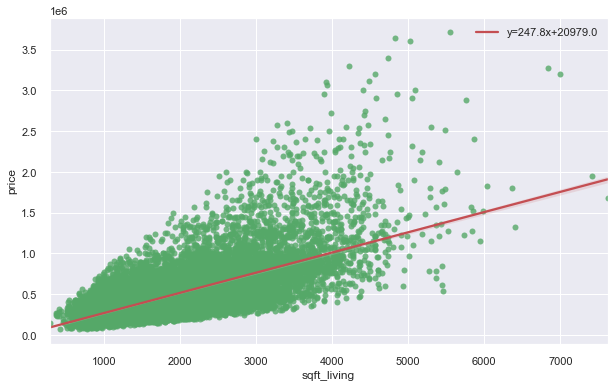

In [36]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(H_Sales['sqft_living'],H_Sales['price'])

f = plt.figure(figsize=(10,6))
data = H_Sales[['price','sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()


In [37]:
print(slope, intercept)

247.76255038637933 20979.027210257074


In [38]:
print(std_err)

2.022539667148688


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [40]:
#Here we splitting the data into 80:20 ratio of which train_size is 80%, test_size is 20%.
train_data,test_data=train_test_split(H_Sales,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Squared mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Squared mean error 224683.19
R squared training 0.441
R squared testing 0.41
intercept [15621.48109262]
coefficient [[250.31518667]]


#### R Squared testing=0.41

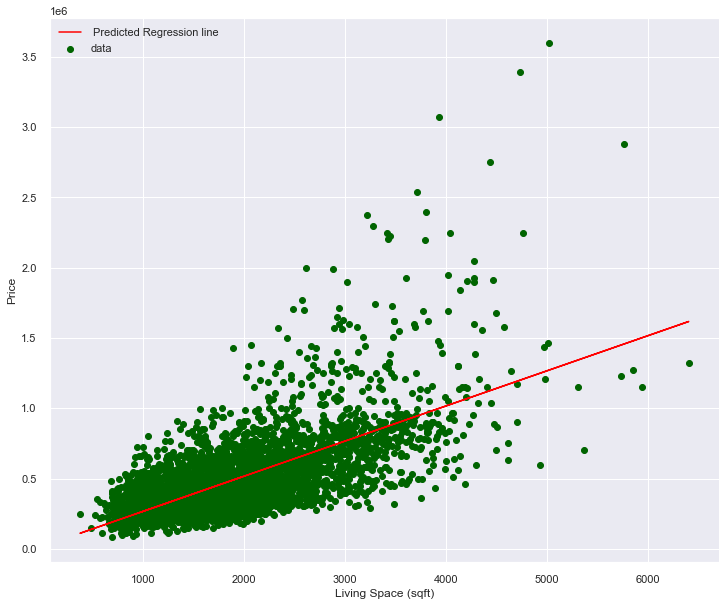

In [42]:
#A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [43]:
#Here we are splitting the data in 80:20 ratio, of which train_size is 80% and test_size is 20%. Here x is ‘grade’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.
train_data,test_data=train_test_split(H_Sales,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression()

In [44]:

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 226372.22
R squared training 0.434
R squared testing 0.401
intercept [-820262.48100971]
coeeficient [[174919.98365361]]


#### R Squared testing=0.40

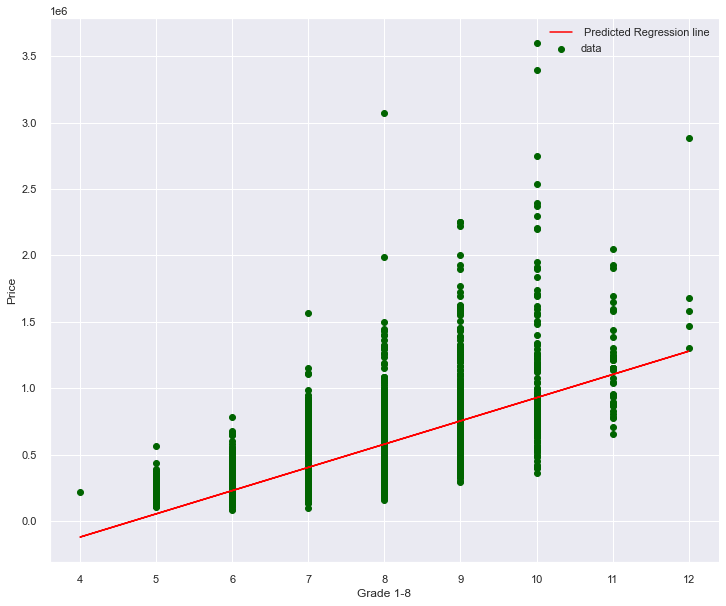

In [45]:
#A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Grade 1-8')
plt.ylabel('Price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [46]:
#The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’. These are considered are one feature namely features1. Now the data is fitted into the model and test_data of features1 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')


complex_model 1


In [47]:
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

mean squared error(MSE) 208817.01
R squared training 0.521
R squared training 0.49
Intercept:  -436385.518821295
Coefficient: [-5.30320684e+04  1.05224130e+05  2.34007785e+02 -8.47978057e+01]


#### R Squared testing=0.49

In [48]:
#The features we are considering are ‘bedrooms’, ’bathrooms’, ’sqft_living’, ’sqft_lot’, ’floors’, ’waterfront’, ’view’, ’grade’, ’sqft_above’, ’sqft_basement’, ’lat’,’sqft_living15'. These are considered are one feature namely features2. Now the data is fitted into the model and test_data of features2 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')


Complex Model_2


In [49]:
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Mean Squared Error (MSE)  208817.01
R-squared (training)  0.521
R-squared (testing)  0.49
Intercept:  -436385.518821295
Coefficient: [-5.30320684e+04  1.05224130e+05  2.34007785e+02 -8.47978057e+01]


### Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.

In [51]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  203678.78
R-squared (training)  0.564
R-squared (testing)  0.515


#### R-squared testing: 0.515

In [52]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  203482.0
R-squared (training)  0.571
R-squared (testing)  0.516


#### R-squared testing: 0.516